# COGS 108 - Final Project 

# Notes
- add severity
- severity depends on hour, weather, visibility?
- visualization severity vs [weather, rush hour, hour, etc]
- fix intro (background, question, and hypothesis)
- hypothesis: how do certain factors affect the severity of the accident
- compare average severity of accident based on some factor


## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [  ] YES - make available
* [X] NO - keep private

# Overview

The car accidents rate in the US can be considered high.
We analyzed that some of the factors related to accidents are weather conditions, time of the incident, visibility, and severity. In this project, we will state our initial hypothesis about the factors causing accidents. With our large dataset, we will do cleaning, visualizing, and analyzing to come up with a conclusion to prove the correctness of our hypothesis.

# Names

- Carlos Wirawan
- Albert Estevan
- Nikolas Jody
- Nhat Tang
- Sheung Ho

# Group Members IDs

- A16112534
- A16093782
- A16105519
- A15565669
- A16081238

# Research Question

We are interested in what are the factors to cause traffic accidents in the US. As there are a lot more cars during rush hours, we want to find out the correlation between the period of time in a day/week (rush hour/non-rush hour, weekend/weekday) and the accident rate. Therefore, our research question is: Is there more accidents during rush hours due to the higher volume of traffic? At the same time, as the period of the day is not the only factor that causes a car accident, the other questions that we may also consider:
- Does the average severity directly correlate with another factor?
- Will the “rush-hour” time frame have the highest rate of accidents?
- Does “rush-hour” accidents have higher severity overall?
- Does the weather condition affect the accident rate?
- Does the visibility of the day affect the accident rate?

## Background and Prior Work

In the modern age, cars are everywhere and are the main form of transportation for many people in the U.S. As a result, driving has become an almost vital skill. With the sheer volume of cars on the road, there are bound to be many accidents that occur throughout the year in the country. In fact, there are an average of six million accidents a year happening in the U.S. alone and about three million people suffer injuries because of these accidents. With these numbers, it would seem that the roads are quite dangerous even with all the current regulations(Reference 1).

Thus, the goal of our project is to analyze the factors involved in accidents to see if there is some underlying connection between them. If there is a strong connection between accidents and a particular factor(s), it would be possible to reform the country based on the observed factor. For example, if the factor was time and it was observed that the time where most accidents tended to happen was rush hour, we can implement special regulations or change driver behavior so that drivers would drive more safely during this time.

Current studies reveal that there are many fatal accidents during evening rush hour as compared to morning rush hour, which may be a bit odd since there should be the same amount of cars on the road during either of these times. What is also interesting is that there tend to be more accidents during the weekends than during the weekdays. The statistics vary depending on state, but it is also important to consider that these statistics were only for 2016. Thus, it is unclear if accurate conclusions can be drawn from this data alone(Reference 2).
References:
- 1) https://www.driverknowledge.com/car-accident-statistics/
- 2) https://www.automoblog.net/2018/07/10/most-dangerous-times-to-drive/


# Hypothesis


We believe that the rate of car accidents will be higher during rush hour (3pm-6pm) on city streets. Because during rush hours people tend to be driving for a longer time than usual and the volume of cars will be high. On city streets, junctions are everywhere and that can contribute to higher number of accidents as junctions are prone to accidents.

Some factors of accidents are:
- Weather conditions : Certain weather conditions may cause  interference to a person's driving which may cause accidents.
- Traffic volume:  The higher the number of cars on the road may increase the chance of an accident occurring.
- Time of day: The time of day determines whether it is night or day in which the visibility differs and also rush hour time (3pm-6pm) where traffic volume increases significantly.
- Visibility: Having a low visibility will cause people to be vulnerable to accidents.
- Junctions: Accidents occured on junctions may have a high rate of severity.
- Severity: the rate of the accident’s impact to the traffic surrounding the accident.

# Dataset(s)

The data set that we are using is taken from the following web page.

Link: https://www.kaggle.com/sobhanmoosavi/us-accidents

Size: 1.05GB

Variable:
Time: The time of the accidents can be found in two of the columns of the dataset. One column indicates the estimated start time, and the other column indicates the estimated end time.
Location: The data set contains the estimated latitude and the longitude of the location where the accident occurs. We are planning to use these datas to present them on a map.
Number of accidents: The number of accidents will be the number of rows presented in the data set. This will be filtered by the start time of the accident.
Severity of accidents: The severity can be found in the column of the data set. It shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic.
Weather Condition: The weather is presented in the column of the data set, it indicates the weather when the accidents occured.

Accuracy of data: 
The data has more than a million accident reports that occured in the United States. We are certain that with this amount of datas, we can create a good analysis. The data is taken from  https://www.kaggle.com/, an online community of data scientists and machine learning practitioners. The kaggle user who posted the data cited that the data is taken from MapQuest, an American free online web mapping service owned by Verizon Media. Thus, we are certain that the source is legitimate.


# Setup

In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import patsy 
import statsmodels.api as sm
from scipy.stats import ttest_ind, chisquare, normaltest

pd.set_option('precision', 2)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 50

In [2]:
file_path = 'US_Accidents_Dec19.csv'
df = pd.read_csv(file_path)

In [3]:
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87,-84.06,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93,-82.83,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06,-84.03,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974332,A-2974356,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.78,-117.85,33.78,-117.86,0.56,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2974333,A-2974357,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99,-118.40,33.98,-118.40,0.77,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2974334,A-2974358,Bing,NaN,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13,-117.23,34.14,-117.24,0.54,At Highland Ave/Arden Ave - Accident.,NaN,CA-210 W,R,Highland,San Bernardino,CA,92346,US,US/Pacific,KSBD,2019-08-23 20:50:00,79.0,79.0,47.0,28.63,7.0,SW,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


# Data Cleaning

* From the table above, we can see that there are a lot of columns, and most of them are going to be used. So we are going to only select used columns.


In [4]:
# Only consider the columns used
df = df[['Start_Time','Weather_Condition','Visibility(mi)', 'Severity', 'Junction', 'Traffic_Signal']]

###### Drop NAN values

In [5]:
# Drop NAN data
df = df.dropna(subset=['Visibility(mi)', 'Start_Time', 'Weather_Condition', 'Severity'])

Round up the decimal values.

In [6]:
df['Visibility(mi)'] = df['Visibility(mi)'].round(0)
df['Visibility(mi)'].value_counts()

10.0     2313768
7.0        89504
9.0        78885
          ...   
63.0           1
130.0          1
67.0           1
Name: Visibility(mi), Length: 46, dtype: int64

There are only a few accidents with visibility over 20, so we are going to change the ones above 20 to 20. And we log the count value for visualization purpose.

In [7]:
def normalize(x):
    if x >20:
        return 20
    else:
        return x
    
def logNorm(x):
    return math.log10(x)

In [8]:
df['Visibility(mi)'] = df['Visibility(mi)'].apply(normalize)

In [9]:
df

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal
0,2016-02-08 05:46:00,Light Rain,10.0,3,False,False
1,2016-02-08 06:07:59,Light Rain,10.0,2,False,False
2,2016-02-08 06:49:27,Overcast,10.0,2,False,True
...,...,...,...,...,...,...
2974332,2019-08-23 19:00:21,Partly Cloudy,10.0,2,True,False
2974333,2019-08-23 19:00:21,Fair,10.0,2,False,False
2974334,2019-08-23 18:52:06,Fair,7.0,2,False,False


In [10]:
visibility_counts = df['Visibility(mi)'].value_counts()
visibility_counts

10.0    2313768
7.0       89504
9.0       78885
         ...   
14.0          6
19.0          2
16.0          1
Name: Visibility(mi), Length: 19, dtype: int64

In [11]:
visibility_counts = visibility_counts.apply(logNorm)

In [12]:
# Sort Index
visibility_counts = visibility_counts.sort_index()

Set the index to a list as the x axis, set the values as the y axis.

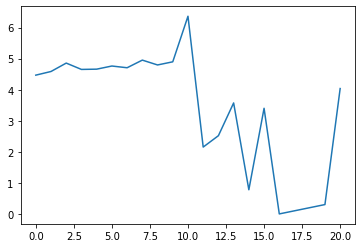

In [13]:
x = visibility_counts.index.tolist()
y = visibility_counts.tolist()
plt.plot(x,y)

###### Clean the start-time and end time

Clear the date

In [14]:
df_updated = df.replace(to_replace ='[0-9]{4}-[0-9]{2}-[0-9]{2} ', value = '', regex = True)

Make a new column called 'Hour' to keep track of the time round down to the nearest hour.

In [15]:
df_updated=df_updated.assign(Hour = df_updated['Start_Time'])
df_updated.head()

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour
0,05:46:00,Light Rain,10.0,3,False,False,05:46:00
1,06:07:59,Light Rain,10.0,2,False,False,06:07:59
2,06:49:27,Overcast,10.0,2,False,True,06:49:27
3,07:23:34,Mostly Cloudy,9.0,3,False,False,07:23:34
4,07:39:07,Mostly Cloudy,6.0,2,False,True,07:39:07


In [16]:
df_updated['Hour'] = df_updated['Hour'].replace(to_replace =':[0-9]{2}:[0-9]{2}', value = '', regex = True)
df_updated.head()

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour
0,05:46:00,Light Rain,10.0,3,False,False,05
1,06:07:59,Light Rain,10.0,2,False,False,06
2,06:49:27,Overcast,10.0,2,False,True,06
3,07:23:34,Mostly Cloudy,9.0,3,False,False,07
4,07:39:07,Mostly Cloudy,6.0,2,False,True,07


Group them by rush hour and non rush hour

In [17]:
df_hour=df_updated.groupby('Hour').size()

# change string to int
df_updated['Hour'] = pd.to_numeric(df_updated['Hour'])

In [18]:
df_updated['Rush_Hour'] = np.where(((df_updated['Hour']>=16) & (df_updated['Hour']<20) | (df_updated['Hour'] >= 6) & (df_updated['Hour'] < 10)), True, False)
df_updated

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour,Rush_Hour
0,05:46:00,Light Rain,10.0,3,False,False,5,False
1,06:07:59,Light Rain,10.0,2,False,False,6,True
2,06:49:27,Overcast,10.0,2,False,True,6,True
...,...,...,...,...,...,...,...,...
2974332,19:00:21,Partly Cloudy,10.0,2,True,False,19,True
2974333,19:00:21,Fair,10.0,2,False,False,19,True
2974334,18:52:06,Fair,7.0,2,False,False,18,True


Split the data set into two dataframes that contains only the rush hour accident and only the non rush hour accident.

In [19]:
df_rushhour = df_updated[df_updated['Rush_Hour'] == True]
df_rushhour

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour,Rush_Hour
1,06:07:59,Light Rain,10.0,2,False,False,6,True
2,06:49:27,Overcast,10.0,2,False,True,6,True
3,07:23:34,Mostly Cloudy,9.0,3,False,False,7,True
...,...,...,...,...,...,...,...,...
2974332,19:00:21,Partly Cloudy,10.0,2,True,False,19,True
2974333,19:00:21,Fair,10.0,2,False,False,19,True
2974334,18:52:06,Fair,7.0,2,False,False,18,True


In [20]:
df_rushhour.groupby('Hour').size()

Hour
6     164525
7     267036
8     277671
       ...  
17    216721
18    163489
19    112686
Length: 8, dtype: int64

In [21]:
df_nonrushhour = df_updated[df_updated['Rush_Hour'] == False]

df_nonrushhour

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour,Rush_Hour
0,05:46:00,Light Rain,10.0,3,False,False,5,False
20,10:11:15,Light Snow,2.0,2,False,False,10,False
21,10:24:27,Mostly Cloudy,10.0,2,False,False,10,False
...,...,...,...,...,...,...,...,...
2974314,15:23:31,Fair,8.0,2,True,False,15,False
2974315,15:33:46,Fair,10.0,2,True,False,15,False
2974317,15:45:43,Fair,10.0,2,True,False,15,False


In [22]:
# Check out the size of the df
print(df_nonrushhour.shape)
print(df_rushhour.shape)

(1318334, 8)
(1582878, 8)


Visualize and compare the visibility of accidents occured dduring rush hour and non rush hour.

In [23]:
df_rushhour['Visibility(mi)'].value_counts().sort_index()

0.0     19068
1.0     22800
2.0     41132
        ...  
16.0        1
19.0        1
20.0     7213
Name: Visibility(mi), Length: 19, dtype: int64

In [24]:
df_nonrushhour['Visibility(mi)'].value_counts().sort_index()

0.0     10296
1.0     15705
2.0     30670
        ...  
15.0     1098
19.0        1
20.0     3654
Name: Visibility(mi), Length: 18, dtype: int64

Clean Weather data and group them into 4 categories:
- Percipitation
- Clear
- Cloudy
- Other

In [25]:
def standardize_weather(string):
    
    string = string.lower()
    string = string.strip()
    
    if 'snow' in string:
        output = 'PRECIPITATION'
    elif 'ice' in string:
        output = 'PRECIPITATION'
    elif 'wintry' in string:
        output = 'PRECIPITATION'
    elif 'hail' in string:
        output = 'PRECIPITATION'
    elif 'clear' in string:
        output = 'CLEAR'
    elif 'rain' in string:
        output = 'PRECIPITATION'
    elif 'drizzle' in string:
        output = 'PRECIPITATION'
    elif 'thunder' in string:
        output = 'PRECIPITATION'
    elif 't-storm' in string:
        output = 'PRECIPITATION'
    elif 'haze' in string:
        output = 'OTHER'
    elif 'mist' in string:
        output = 'OTHER'
    elif 'partly cloudy' in string:
        output = 'CLEAR'
    elif 'cloud' in  string:
        output = 'CLOUDY'
    elif 'overcast' in  string:
        output = 'CLOUDY'
    elif 'fair' in  string:
        output = 'CLEAR'
    else:
        output = 'OTHER'
    return output

In [26]:
df_updated = df_updated.dropna(subset=['Weather_Condition'])
df_updated['Weather_Condition'] = df_updated['Weather_Condition'].apply(standardize_weather)

In [27]:
df_updated.head()

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour,Rush_Hour
0,05:46:00,PRECIPITATION,10.0,3,False,False,5,False
1,06:07:59,PRECIPITATION,10.0,2,False,False,6,True
2,06:49:27,CLOUDY,10.0,2,False,True,6,True
3,07:23:34,CLOUDY,9.0,3,False,False,7,True
4,07:39:07,CLOUDY,6.0,2,False,True,7,True


In [28]:
df_updated['junct_traff'] = np.where(((df_updated['Junction']==True) | (df_updated['Traffic_Signal'] == True)), True, False)
df_updated

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour,Rush_Hour,junct_traff
0,05:46:00,PRECIPITATION,10.0,3,False,False,5,False,False
1,06:07:59,PRECIPITATION,10.0,2,False,False,6,True,False
2,06:49:27,CLOUDY,10.0,2,False,True,6,True,True
...,...,...,...,...,...,...,...,...,...
2974332,19:00:21,CLEAR,10.0,2,True,False,19,True,True
2974333,19:00:21,CLEAR,10.0,2,False,False,19,True,False
2974334,18:52:06,CLEAR,7.0,2,False,False,18,True,False


In [29]:
df_updated['junct_traff_rush'] = np.where((((df_updated['Junction']==True) | (df_updated['Traffic_Signal'] == True)) & (df_updated['Rush_Hour'] == True)), True, False)
df_updated

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour,Rush_Hour,junct_traff,junct_traff_rush
0,05:46:00,PRECIPITATION,10.0,3,False,False,5,False,False,False
1,06:07:59,PRECIPITATION,10.0,2,False,False,6,True,False,False
2,06:49:27,CLOUDY,10.0,2,False,True,6,True,True,True
...,...,...,...,...,...,...,...,...,...,...
2974332,19:00:21,CLEAR,10.0,2,True,False,19,True,True,True
2974333,19:00:21,CLEAR,10.0,2,False,False,19,True,False,False
2974334,18:52:06,CLEAR,7.0,2,False,False,18,True,False,False


In [30]:
df_updated['junct_traff_nonrush'] = np.where((((df_updated['Junction']==True) | (df_updated['Traffic_Signal'] == True)) & (df_updated['Rush_Hour'] == False)), True, False)
df_updated

,Start_Time,Weather_Condition,Visibility(mi),Severity,Junction,Traffic_Signal,Hour,Rush_Hour,junct_traff,junct_traff_rush,junct_traff_nonrush
0,05:46:00,PRECIPITATION,10.0,3,False,False,5,False,False,False,False
1,06:07:59,PRECIPITATION,10.0,2,False,False,6,True,False,False,False
2,06:49:27,CLOUDY,10.0,2,False,True,6,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2974332,19:00:21,CLEAR,10.0,2,True,False,19,True,True,True,False
2974333,19:00:21,CLEAR,10.0,2,False,False,19,True,False,False,False
2974334,18:52:06,CLEAR,7.0,2,False,False,18,True,False,False,False


# Data Analysis & Results

Let's take a look at what our data looks like when we visualize it using various graphs. First, let's look at how the number of car crashes varies by the hour of day.

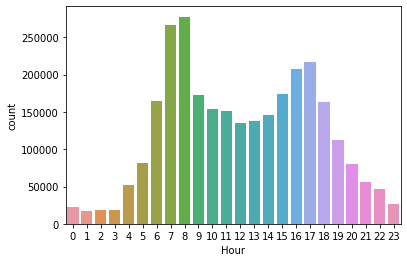

In [31]:
sns.countplot(x = 'Hour', data = df_updated)

[<matplotlib.axis.XTick object at 0x7f35691b70b8>, <matplotlib.axis.XTick object at 0x7f356920a1d0>, <matplotlib.axis.XTick object at 0x7f356920acf8>, <matplotlib.axis.XTick object at 0x7f3569155d30>, <matplotlib.axis.XTick object at 0x7f3569171978>, <matplotlib.axis.XTick object at 0x7f3569171e48>, <matplotlib.axis.XTick object at 0x7f3569179358>, <matplotlib.axis.XTick object at 0x7f356915f0f0>, <matplotlib.axis.XTick object at 0x7f3569179a58>, <matplotlib.axis.XTick object at 0x7f3569179e48>, <matplotlib.axis.XTick object at 0x7f356917f400>, <matplotlib.axis.XTick object at 0x7f356917f978>]


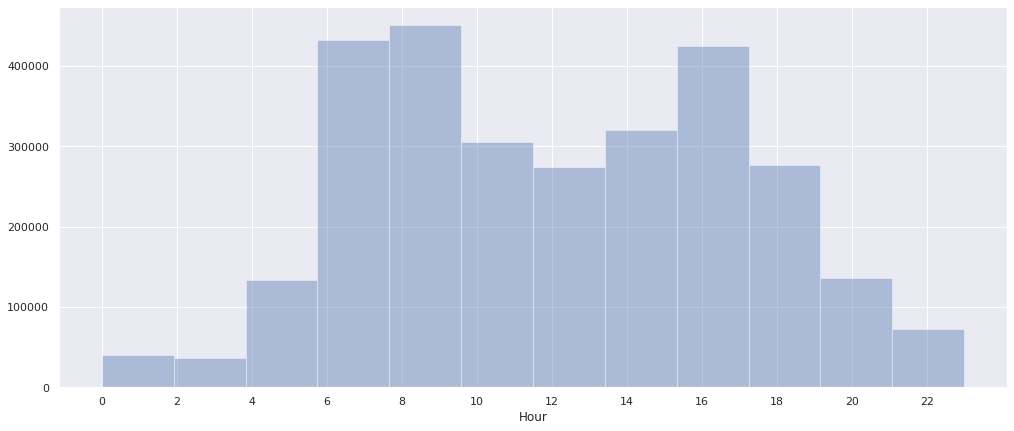

In [32]:
# plt.rcParams['figure.figsize'] = (17, 7)
# sns.set()
# ax = sns.distplot((df_updated['Hour']), kde = False, bins = 12)
# print(ax.xaxis.set_ticks(np.arange(0, 23, 2)))
# del ax

Here, we see that the data distribution appears to be bimodal, spiking at around 8AM and 4PM. There must be something special about these times that correlates with a higher number of accidents. For one, these hours are within the morning and evening rush hours so that could be the factor that relates to a higher number of accidents. Let's try to figure out the probability that a car crash occurs during rush hour. Since we made a column in our dataframe earlier to sort each accident into rush hour and non-rush hour, we can just graph the data using a bar graph.

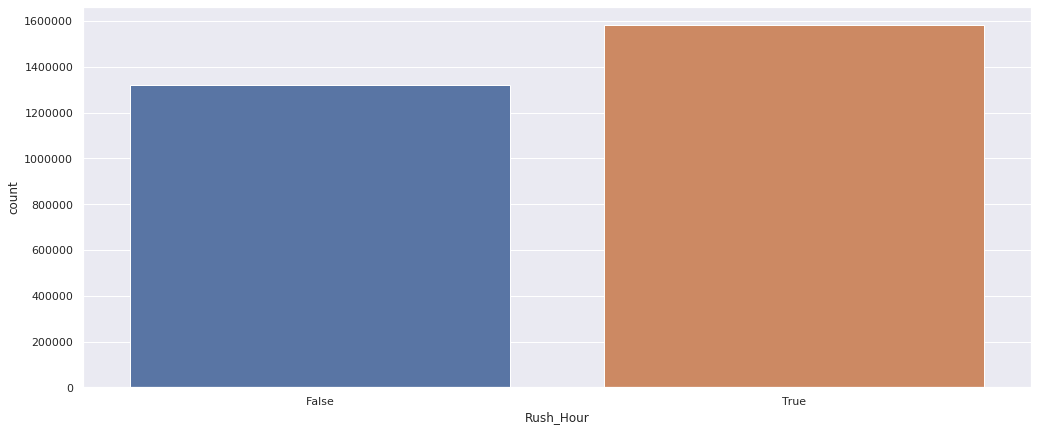

In [33]:
sns.countplot(x = 'Rush_Hour', data = df_updated)

From this graph, we see that there are more accidents that occur during rush hour than during non-rush hours, but we need a value so we can do a more detailed analysis.

In [34]:
probability_rush = sum(df_updated['Rush_Hour'])/len(df_updated['Rush_Hour'])
probability_rush

0.5455919801793182

With this probability, we can predict how many accidents are rush-hour accidents from a random sample or group of accidents. If we repeat this procedure many times and graph the results, we will get something that looks like a binomial distribution. Let's say we have 10000 trials, so n = 10000 and we repeat the procedure 10000 times. For the sake of our analysis let's have the null hypothesis be that there is an equal chance that accidents occur during rush hour and during non-rush hour (probability = 0.5). If we make a binomial distribution using the probability from the null hypothesis and the probability that we got from our data, we can compare the two distributions to see if there is a significant difference between the two.

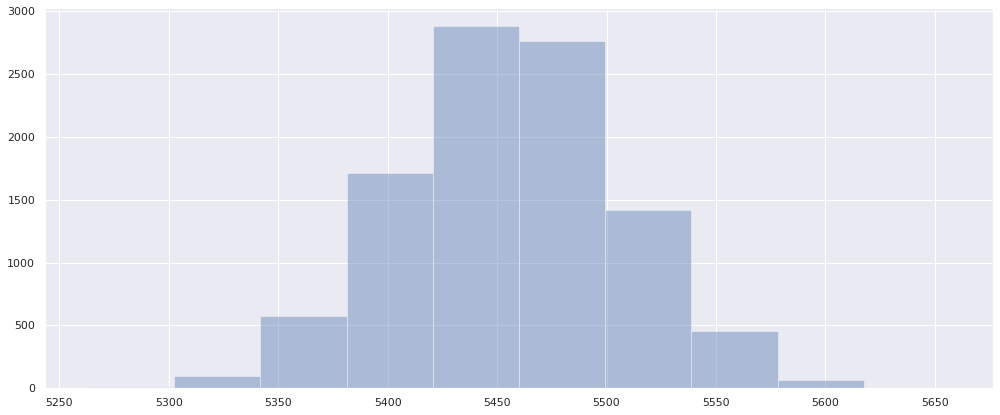

In [35]:
#binomial distribution using probability from data
binom_rush = np.random.binomial(10000, probability_rush, 10000)
sns.distplot(binom_rush, kde = False, bins = 10)

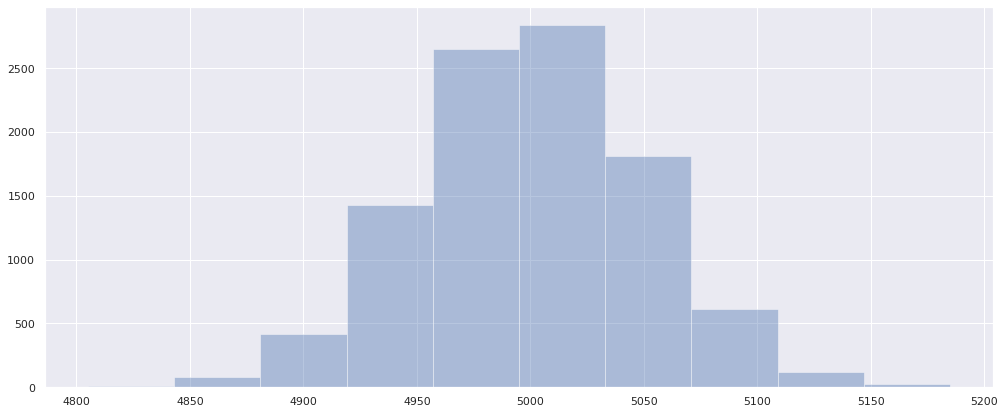

In [36]:
#binomial distribution using hypothesis probability
binom_hypo = np.random.binomial(10000, 0.5, 10000)
sns.distplot(binom_hypo, kde = False, bins = 10)

In [37]:
#compare the distributions to see if there is a significant difference
t_val, p_val = ttest_ind(binom_rush, binom_hypo)
print(p_val)

0.0


In [38]:
#using an alpha level of 0.01
if p_val<0.01:
    print('There IS a significant difference between the two distributions.')
else:
    print('There is NOT a significant difference between the two distributions.')

There IS a significant difference between the two distributions.


The data should tell us that there is a significant difference between the two distributions. From this, we can see that our data does not match with the null hypothesis (that the probability is 0.5) so we have enough evidence to reject it. Thus, we can conclude that the proability of car accidents being rush hour or non-rush hour is not 50%. From our evidence, we can say that it is more likely that car accidents occur during rush hour.

Next, let's visualize how the number of accidents varies with visibility.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


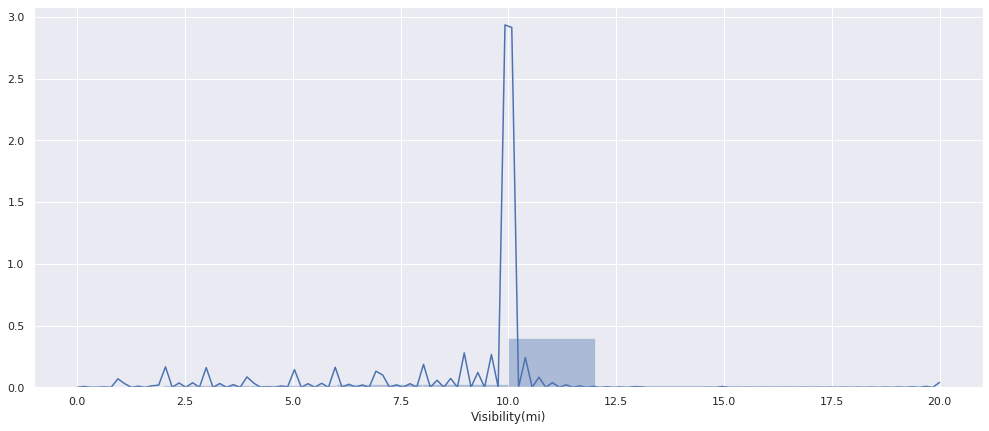

In [39]:
sns.distplot(df_updated['Visibility(mi)'], bins = 10)

In this graph, we see that there is a large number of car accidents occuring when the visibility is around 10 miles. A visibility of 10 miles is pretty standard and common, but there may be some other factors contributing to this spike at 10 miles. How the data was recorded could also have played a role. Since a visibility of 10 miles is common, any small deviation from 10 could just be rounded up or down to 10.

Aside from visibility, we also have weather, so let's take a look at how the number of crashes changes with the weather.

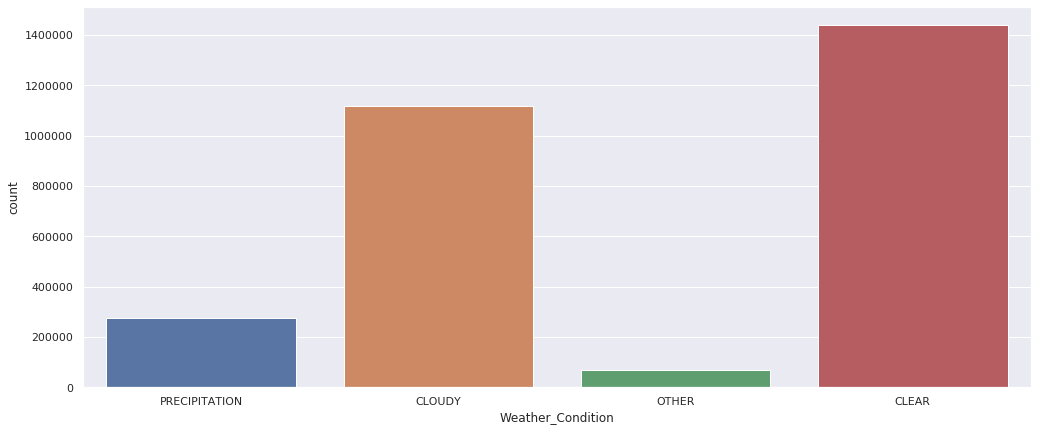

In [40]:
sns.countplot(x = 'Weather_Condition', data = df_updated)

Here, we see many accidents happening when the weather is clear or just cloudy. So, we can assume most accidents happen on any regular day with decent weather. There doesn't seem to be much of a glaring relationship between the weather and the number of accidents. The high number of accidents in clear weather could simply be due to the fact that there are many clear days in the year and not much other types of weather. For other weather types such as weather carrying some sort of precipitation, we might assume that it is due the type of weather being less frequent in the year and thus having fewer accidents. During a storm, people might try to drive more safely, as the roads are more slippery and dangerous, decreasing the number of potential accidents. Others might stay home more during a storm, so there would be less cars out on the road, but there isn't information about the volume of cars in the dataset so we would have to do further research to reach a more definitive conclusion.

In [41]:
# pd.plotting.scatter_matrix(df_updated[[ 'Visibility(mi)', 'Hour']])

While we're still discussing weather, let's see how the severity of accidents changes according to the weather condition.

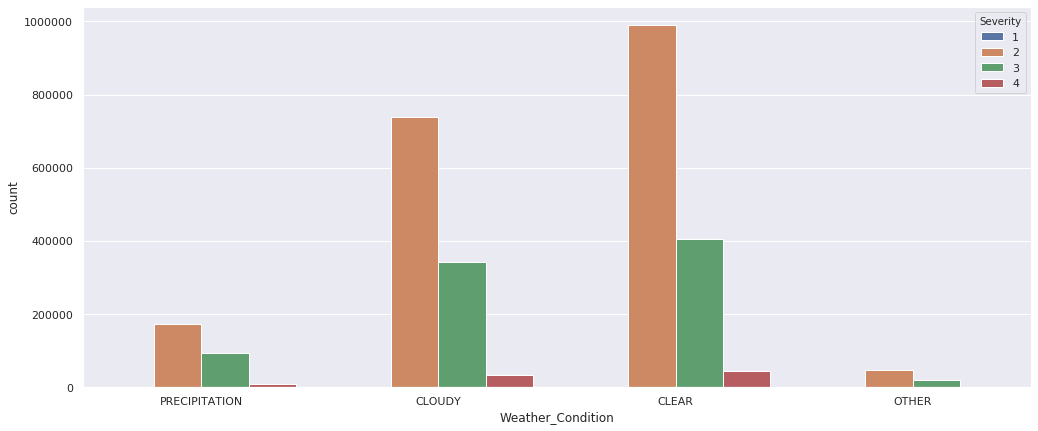

In [42]:
sns.countplot(x = 'Weather_Condition', hue = 'Severity', data = df_updated, order = ['PRECIPITATION', 'CLOUDY', 'CLEAR', 'OTHER'])

Again, we see that clear weather has the highest number of accidents, which is consistent with what we saw with the previous graph. We also see that there is a pattern with each weather has many accidents that are rated with severity 2 and it starts to decrease as we move to severity 4. There are very few if any severity 1 accidents in each graph(we can't clearly see them on the graph, but we could go in the dataset and find them). Overall, there doesn't seem to be much of a correlation between the severity of the accident and the weather condition since the parttern is consistent across all weather types.

With the severity of the accident, let's see how the severity relates to whether or not the accident happened during rush hour.

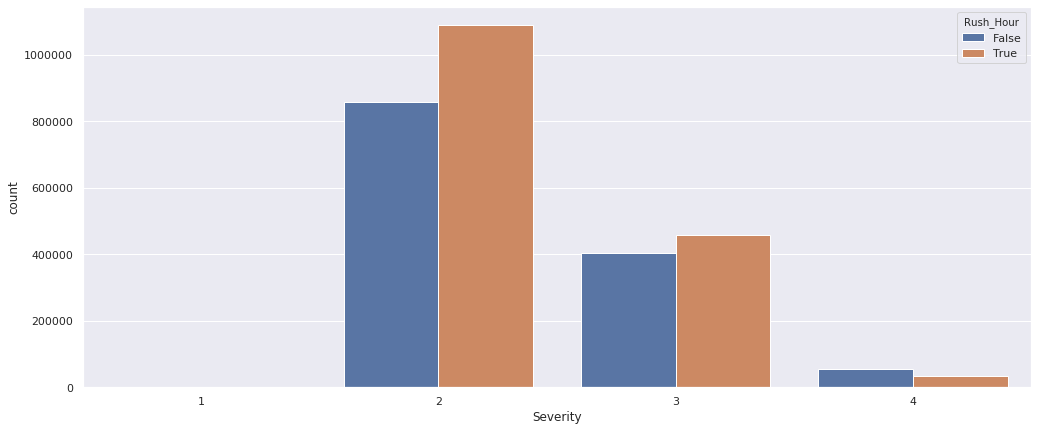

In [43]:
sns.countplot(x = 'Severity', hue='Rush_Hour', data = df_updated)

From the graph, we can't really see many severity 1 accidents. With severity 2 and severity 3, there are more of these accidents during rush hour. However, there are more severity 4 accidents during non-rush hour. We can't just take the raw number of accidents for each category, though. Since there are more accidents during rush hour to begin with, we should take the ratio of

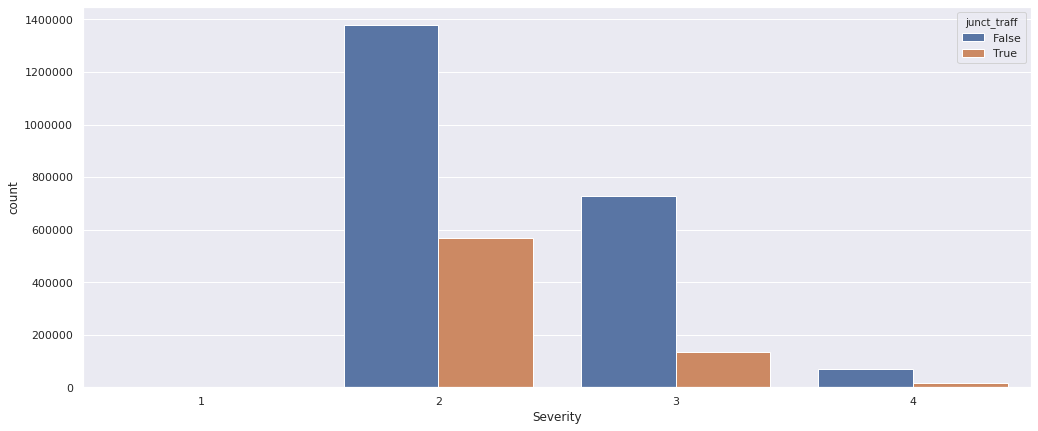

In [53]:
sns.countplot(x = 'Severity', hue='junct_traff', data = df_updated)

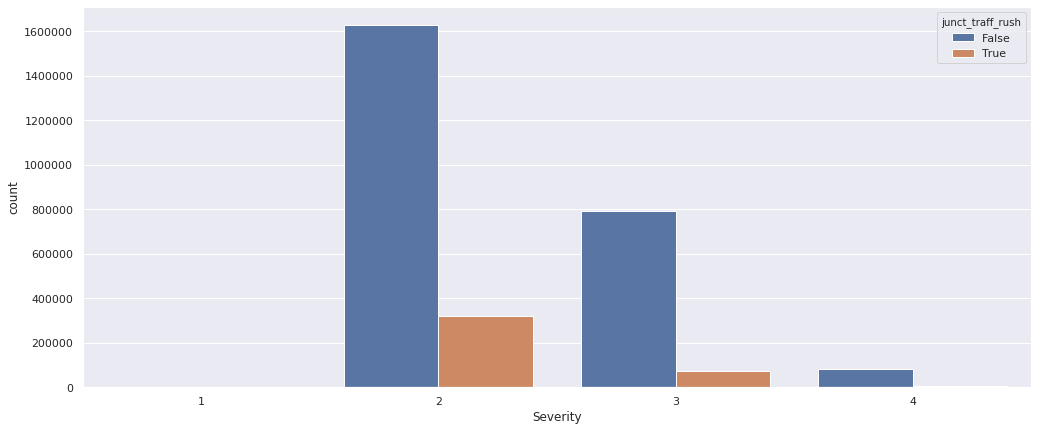

In [54]:
sns.countplot(x = 'Severity', hue='junct_traff_rush', data = df_updated)

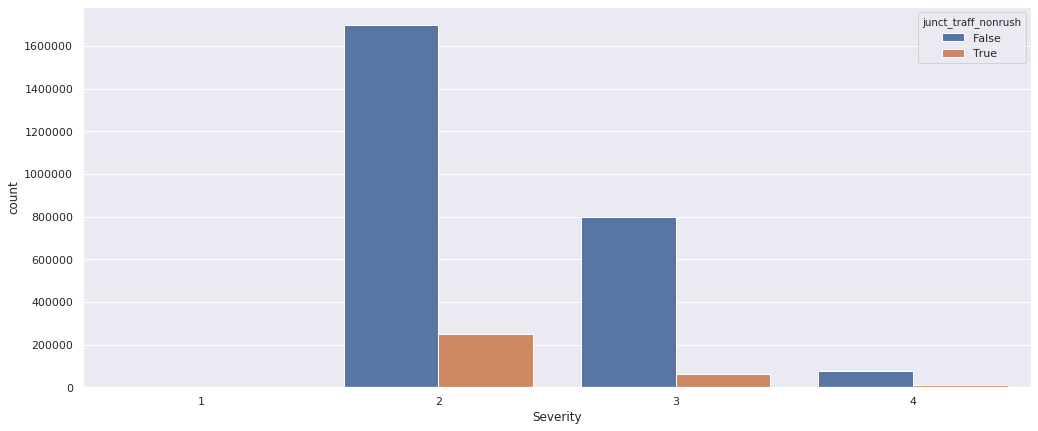

In [55]:
sns.countplot(x = 'Severity', hue='junct_traff_nonrush', data = df_updated)

In [44]:
def get_count(input):
    df_severe = df_updated[df_updated['Severity'] == input]
    series_severe = df_severe['Severity']
    df_severe_RH = df_severe[df_severe['Rush_Hour'] == True]
    df_severe_NRH = df_severe[df_severe['Rush_Hour'] == False]
    severe_NRH_count = df_severe_NRH['Severity'].count()
    severe_RH_count = df_severe_RH['Severity'].count()
    return (severe_NRH_count,severe_RH_count)
    
severe4_NRH_count, severe4_RH_count = get_count(4)
severe3_NRH_count, severe3_RH_count = get_count(3)
severe2_NRH_count, severe2_RH_count = get_count(2)
severe1_NRH_count, severe1_RH_count = get_count(1)

series_severity_RH = df_rushhour['Severity']
series_severity_NRH = df_nonrushhour['Severity']
severity_RH_count = series_severity_RH.count()
severity_NRH_count = series_severity_NRH.count()

NRH_ratio_severe1 = severe1_NRH_count / severity_NRH_count
RH_ratio_severe1 = severe1_RH_count / severity_RH_count 
NRH_ratio_severe2 = severe2_NRH_count / severity_NRH_count
RH_ratio_severe2 = severe2_RH_count / severity_RH_count 
NRH_ratio_severe3 = severe3_NRH_count / severity_NRH_count
RH_ratio_severe3 = severe3_RH_count / severity_RH_count 
NRH_ratio_severe4 = severe4_NRH_count / severity_NRH_count
RH_ratio_severe4 = severe4_RH_count / severity_RH_count 

RH_ratio = np.array([RH_ratio_severe1, RH_ratio_severe2, RH_ratio_severe3, RH_ratio_severe4]) 
NRH_ratio = np.array([NRH_ratio_severe1, NRH_ratio_severe2, NRH_ratio_severe3, NRH_ratio_severe4]) 
severity = np.array([1,2,3,4])
RH_ratio_ser = pd.Series(RH_ratio) 
NRH_ratio_ser = pd.Series(NRH_ratio) 
severity_ser = pd.Series(severity) 

frame = {'severity': severity_ser, 'Rush_Hour_ratio': RH_ratio_ser, 'Non_Rush_Hour_ratio': NRH_ratio_ser}

df_ratio_severity = pd.DataFrame(frame)
df_ratio_severity = df_ratio_severity.set_index('severity')
df_ratio_severity


,Rush_Hour_ratio,Non_Rush_Hour_ratio
severity,,
1,3.52e-04,2.94e-04
2,6.88e-01,6.51e-01
3,2.89e-01,3.07e-01
4,2.22e-02,4.09e-02


In [45]:
df_updated.rename(columns={'Weather_Condition': 'Weather', 'Visibility(mi)': 'Visibility'}, inplace=True)

In [46]:
print(df_updated)

        Start_Time        Weather  Visibility  Severity  Junction  \
0         05:46:00  PRECIPITATION        10.0         3     False   
1         06:07:59  PRECIPITATION        10.0         2     False   
2         06:49:27         CLOUDY        10.0         2     False   
...            ...            ...         ...       ...       ...   
2974332   19:00:21          CLEAR        10.0         2      True   
2974333   19:00:21          CLEAR        10.0         2     False   
2974334   18:52:06          CLEAR         7.0         2     False   

         Traffic_Signal  Hour  Rush_Hour  junct_traff  junct_traff_rush  \
0                 False     5      False        False             False   
1                 False     6       True        False             False   
2                  True     6       True         True              True   
...                 ...   ...        ...          ...               ...   
2974332           False    19       True         True              True 

In [47]:
outcome, predictors = patsy.dmatrices("Severity ~ Visibility", df_updated)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [48]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     339.8
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           7.26e-76
Time:                        16:18:30   Log-Likelihood:            -2.3307e+06
No. Observations:             2901212   AIC:                         4.661e+06
Df Residuals:                 2901210   BIC:                         4.661e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3807      0.001   1913.903      0.0

Since the coefficient of Visibility is close to zero, it doesn't affect anything. Hence, severity and visibility is not related linearly. The value of R-squared is approximately zero, meaning that the linear model that we are using does not fit the data very well. If we were to predict the severity, we would most likely get 2.3807 for any visibility distance, since the model is just; Severity = 2.3807 

In [49]:
outcome, predictors = patsy.dmatrices("Severity ~ Hour", df_updated)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [50]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1776.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:18:34   Log-Likelihood:            -2.3299e+06
No. Observations:             2901212   AIC:                         4.660e+06
Df Residuals:                 2901210   BIC:                         4.660e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3267      0.001   2843.644      0.0

Since the coefficient of hour is close to zero, hour of the day doesn't really have an impact. Severity and hour is not related linearly. The value of R-squared is 0.001, which means the linear model that we are using does not fit the data very well. if we were to predict the severity, we would most likely get 2.3267 for any hour of the day, since the model is just; Severity = 2.3267

In [51]:
outcome, predictors = patsy.dmatrices("Severity ~ Weather", df_updated)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [52]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1554.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:18:47   Log-Likelihood:            -2.3285e+06
No. Observations:             2901212   AIC:                         4.657e+06
Df Residuals:                 2901208   BIC:                         4.657e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Since the coefficient of weather is close to zero, it doesn't really matter as much. Severity and Weather is not related linearly. The value of R-squared is 0.002, which means the linear model that we are using does not fit the data very well. If we were to predict the severity, we would most likely get 2.3416 for any Weather conditions, since the model is just; Severity = 2.3416 

# Ethics & Privacy

We have authority to access the dataset as it is a public dataset. There was no possible data bias after our examination as accident reports the data collected does not correlate with things such as stereotype perpetuation, confirmation bias, etc. We have decided on  using a dataset with a relatively low exposure of personally identifiable information (PII). The subjects in the dataset are anonymous because a unique identifier is used, there was also no unnecessary information collected from the subject. However, in our case, the subjects of the dataset are humans and we are not certain that they have been given information of consent nor did we provide a way for a subject to request their information to be removed from the dataset.

# Conclusion & Discussion

From our analysis we found that accidents are more likely to occur during rush hour than non-rush hour. In our hypothesis, we guessed that this would be the case since there would be a higher volume of cars out on the road and thus more accidents. While our findings do indicate that accidents are more likely to happen during rush hour, we cannot say for sure that the hour is the only factor that makes accidents more likely. There may be some other conditions during rush hour that affect the accident rate.

After using the Ordinary Least Squares Regression method, we found that hour, visibility and weather have little to no affect at predicting severity. we found that all of their coefficients for each conditions is close to zero. Hence it still depend heavily on volume, as the higher of volume of cars, it mostlikely has the same chance of getting an accident for everycar, but having more cars on the road increase the number of accidents.
    
When looking further into accidents in junctions and traffic lights, we assume that we would more likely have a  more accidents there. Because most four way intersection is usually where accidents happen. However our results also show that on junctions and traffic lights we only see a change in similar ratiosn but higher volumes for rush hours and lower volume for non rush hour. Hence our previous assumption holds, that higher volume of cars on the road increases accidents. 
    
In conclusion, we can assume that other factors only play a small part in accidents and volume is the main cause of accidents. We could have done further if we have the total values of cars on the road on a particular day and conditions. However the lack of data limits us for further exploration. 

# Team Contributions

*Specify who in your group worked on which parts of the project.*